## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Above is the dataset and I have some numerical and some categorical columns. But I have to predict whether a person makes over $50K per year.

## EDA

In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It looks very clear that I don't have any empty observations in the dataset.

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values present in the dataset.

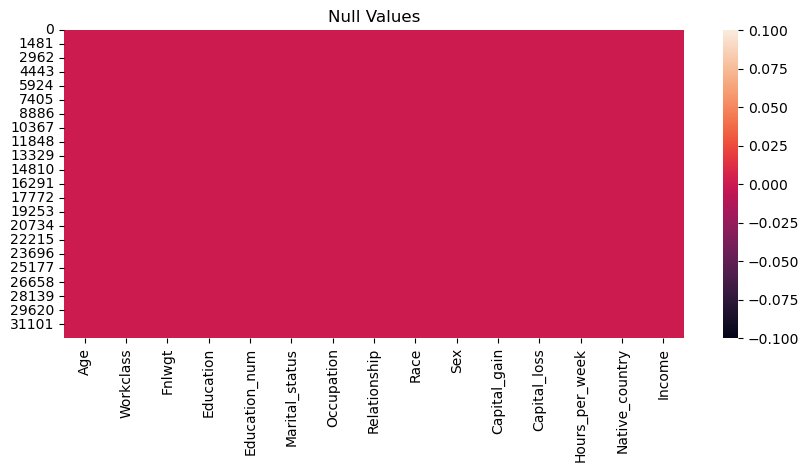

In [10]:
# Visualization of null values

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [11]:
# Checking unique values for the target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are only 2 unique values in the target column. So, it's a binary classification problem.

In [12]:
# Checking for empty observations
df.loc[df['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


There is no empty observations in the dataset.

In [13]:
# Let's check the value count of each column to see if there are any unexpected and unwanted entries present in the column.

for i in df.columns:
    print(df[i].value_counts())
    print('********************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
********************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
********************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
********************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th   

So, I can see that there are some '?' entries in some columns.

So, I have to replace this '?' with the mode of the columns, since they are categorical columns.

In [14]:
# Let's check the mode of Workclass column
df["Workclass"].mode()

0     Private
Name: Workclass, dtype: object

Mode for Workclass column is 'Private'.

In [15]:
# Replacing '?' with mode value
df['Workclass']= df.Workclass.str.replace('?', 'Private')

In [16]:
# Let's check the mode of Occupation column
df["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

Mode for Occupation column is 'Prof-specialty'.

In [17]:
# Replacing '?' with mode value
df['Occupation']= df.Occupation.str.replace('?', 'Prof-specialty')

In [18]:
# Let's check the mode of Native_country column
df["Native_country"].mode()

0     United-States
Name: Native_country, dtype: object

Mode of Native_country column is 'United-States'.

In [19]:
# Replacing '?' with mode value
df['Native_country']= df.Native_country.str.replace('?', 'United-States')

I have replace all '?' with their respective mode values.

In [20]:
# Checking value counts of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [21]:
# Dropping Capital_gain column
df= df.drop(["Capital_gain"], axis=1)

In [22]:
# Checking value counts of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [23]:
# Dropping Capital_loss column
df= df.drop(["Capital_loss"], axis=1)

In [24]:
# Checking the description of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


Describe method will be a summary only for numerical columns by default. This will help us to do analysis on outliers and skewness and checking whether null values present in dataset or not by looking into count.

## VISUALIZATION

In [25]:
# Seperating categorical columns

categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]== 'object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [26]:
# Seperating numerical columns

numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


## UNIVARIATE ANALYSIS

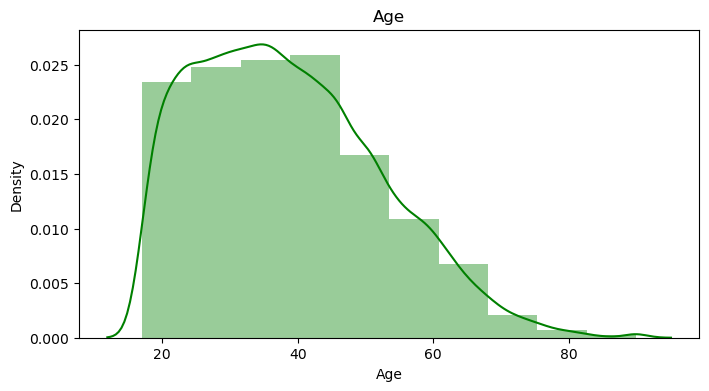

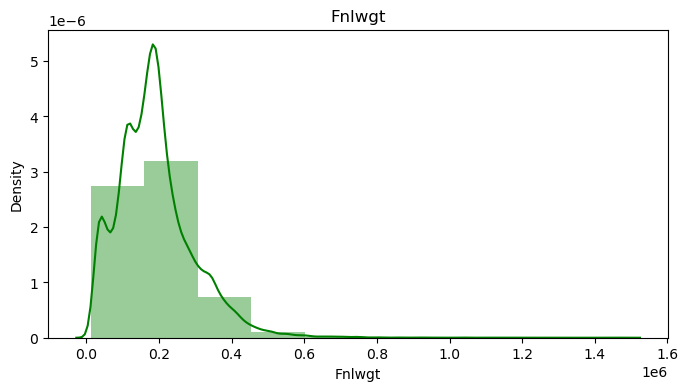

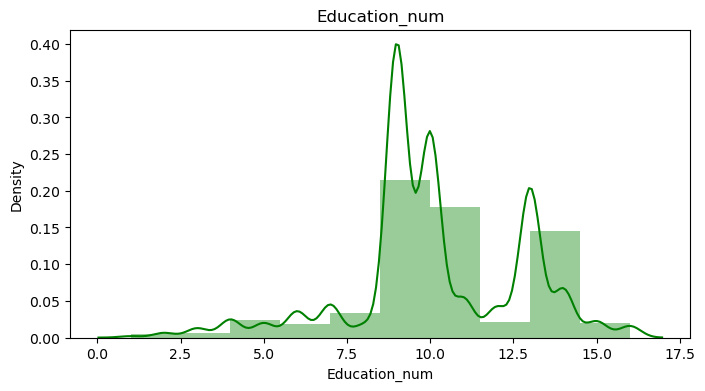

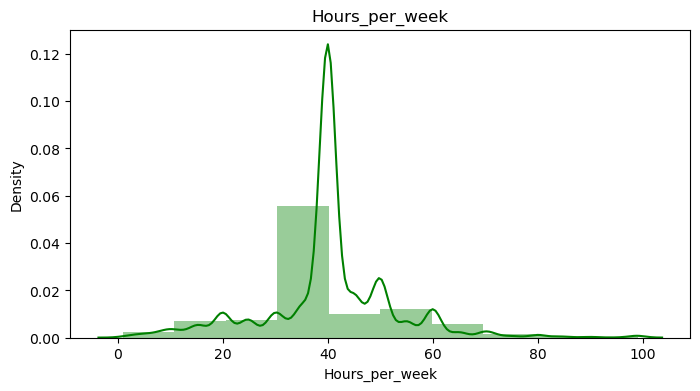

In [27]:
# Distribution plot for all numerical columns

for i in df[numerical_col]:
    plt.figure(figsize=(8,4))
    sns.distplot(df[i], bins=10, color= "g")
    plt.title(i)
    plt.show()

All the numerical columns are skewed but skewness is less in case of Age.

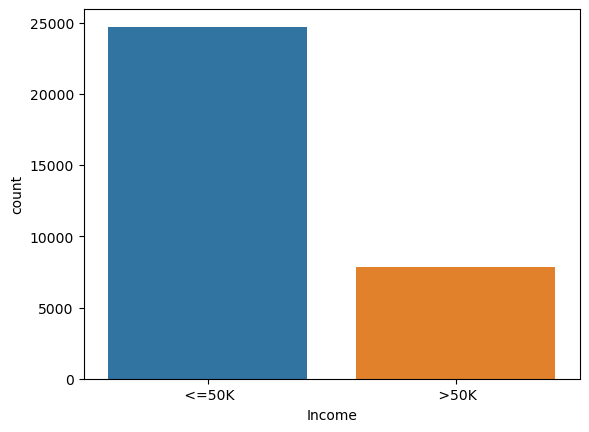

In [28]:
# Count plot for Income
sns.countplot(df['Income']);

By looking into the count plot of target, I can say taht there is a data imbalancing issue. 

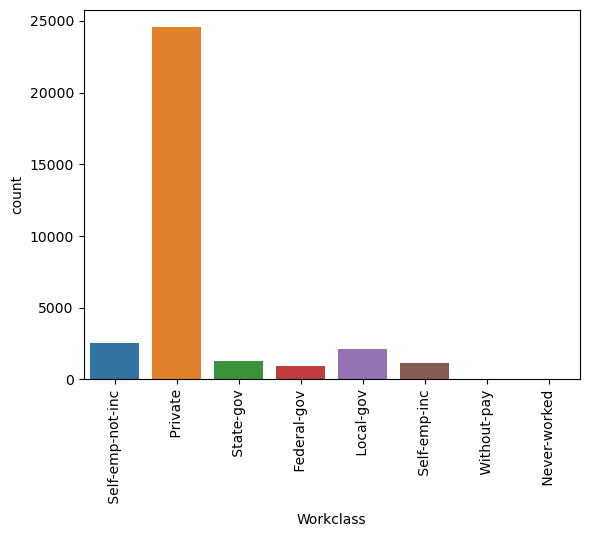

In [29]:
# Countplot for Workclass

sns.countplot(df['Workclass'])
plt.xticks(rotation=90);

Maximun people has choosen Private sector for working and very few people have choose work without-pay and never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

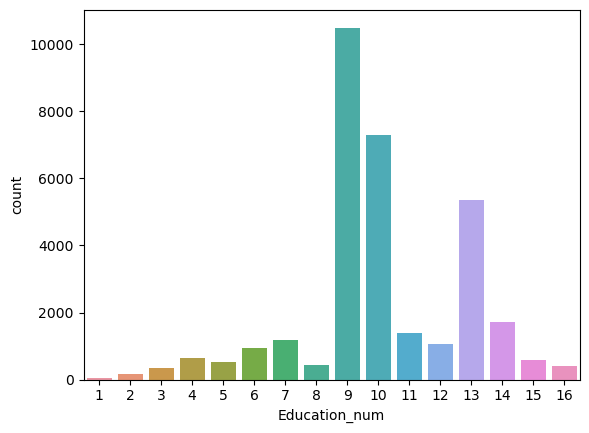

In [30]:
# Countplot for Education_num
sns.countplot(df['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3.

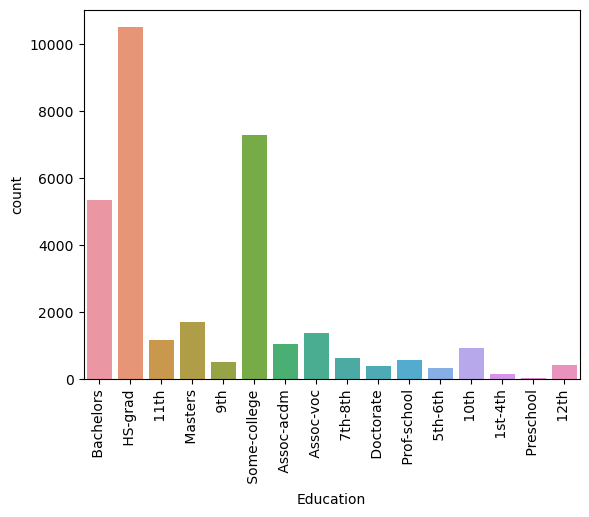

In [31]:
# Countplot for Education

sns.countplot(df['Education'])
plt.xticks(rotation=90);

Above plot says that HS-grad, Bachelors and some-college has max count, which means most of the working people with these 3 types of education has more chance to get job.

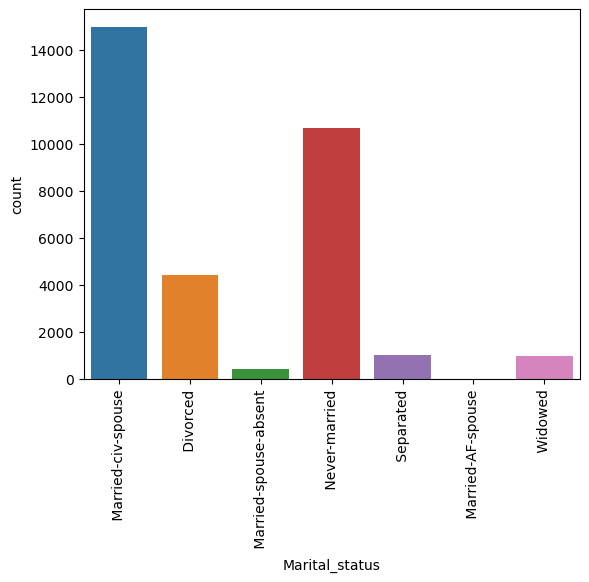

In [32]:
# Countplot for Marital_status

sns.countplot(df['Marital_status'])
plt.xticks(rotation=90);

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

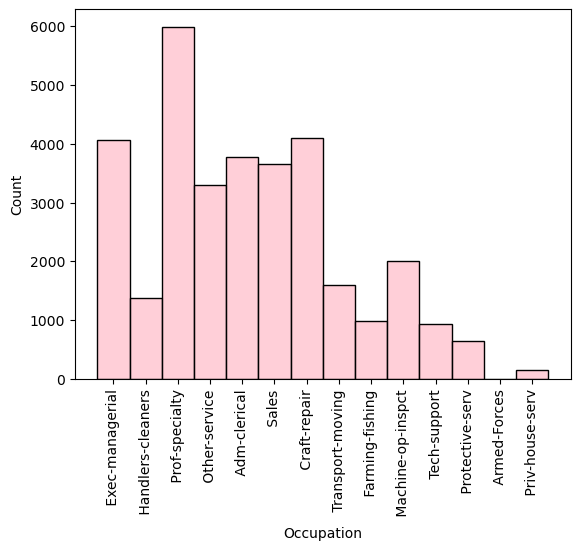

In [33]:
# Histplot for Occupation

sns.histplot(df['Occupation'], color= "pink")
plt.xticks(rotation=90);

Most of the people has choosen Prof-specialty, Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [34]:
# Checking the value count of Relationship
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

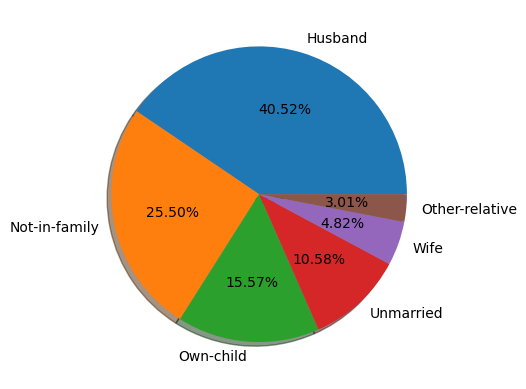

In [35]:
# Plotting piechart for Relationship

labels= 'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'
fig, ax= plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct= '%1.2f%%', shadow= True)
plt.show()

By looking into the Pie chart, most of the count is with Husband, Not-in-family and Own-child.

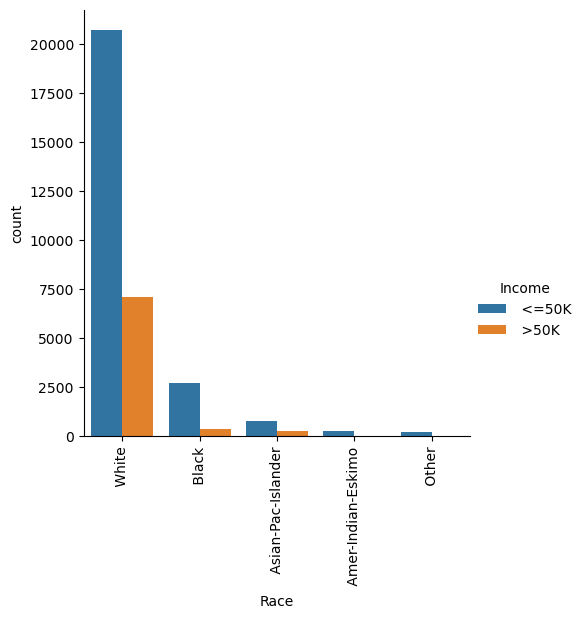

In [36]:
# Factor plot for Race

sns.factorplot('Race', kind= 'count', data=df, hue= 'Income')
plt.xticks(rotation=90);

White people have more chance of getting job than any other raced people.

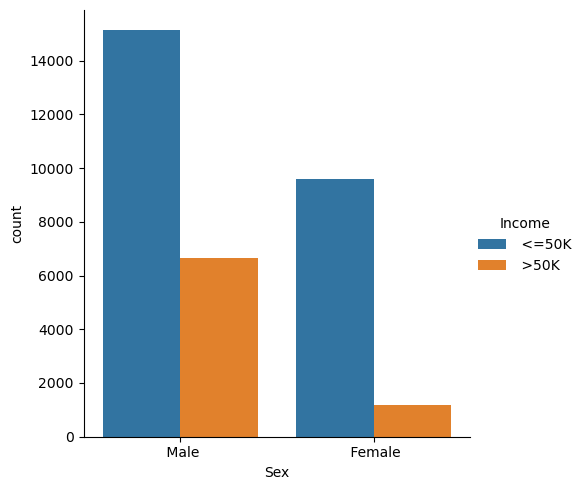

In [37]:
# Factor plot for Sex

sns.factorplot('Sex', kind= 'count', data=df, hue= 'Income')
plt.xticks(rotation=0);

Irrespective of Income, males have high count of getting job than women. Men also has high count of getting Income >50K per annum.

In [38]:
# Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

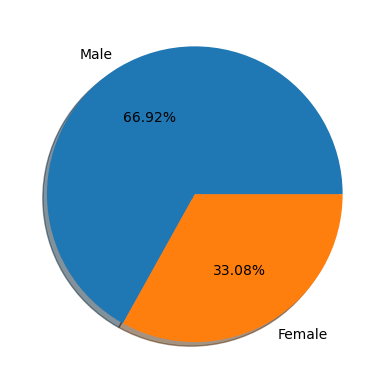

In [39]:
# Plotting piechart for Sex

labels= 'Male', 'Female'
fig, ax= plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct= '%1.2f%%', shadow= True)
plt.show()

Most of the working people about 67% are male and remaining 33% are women which is less in number than male.

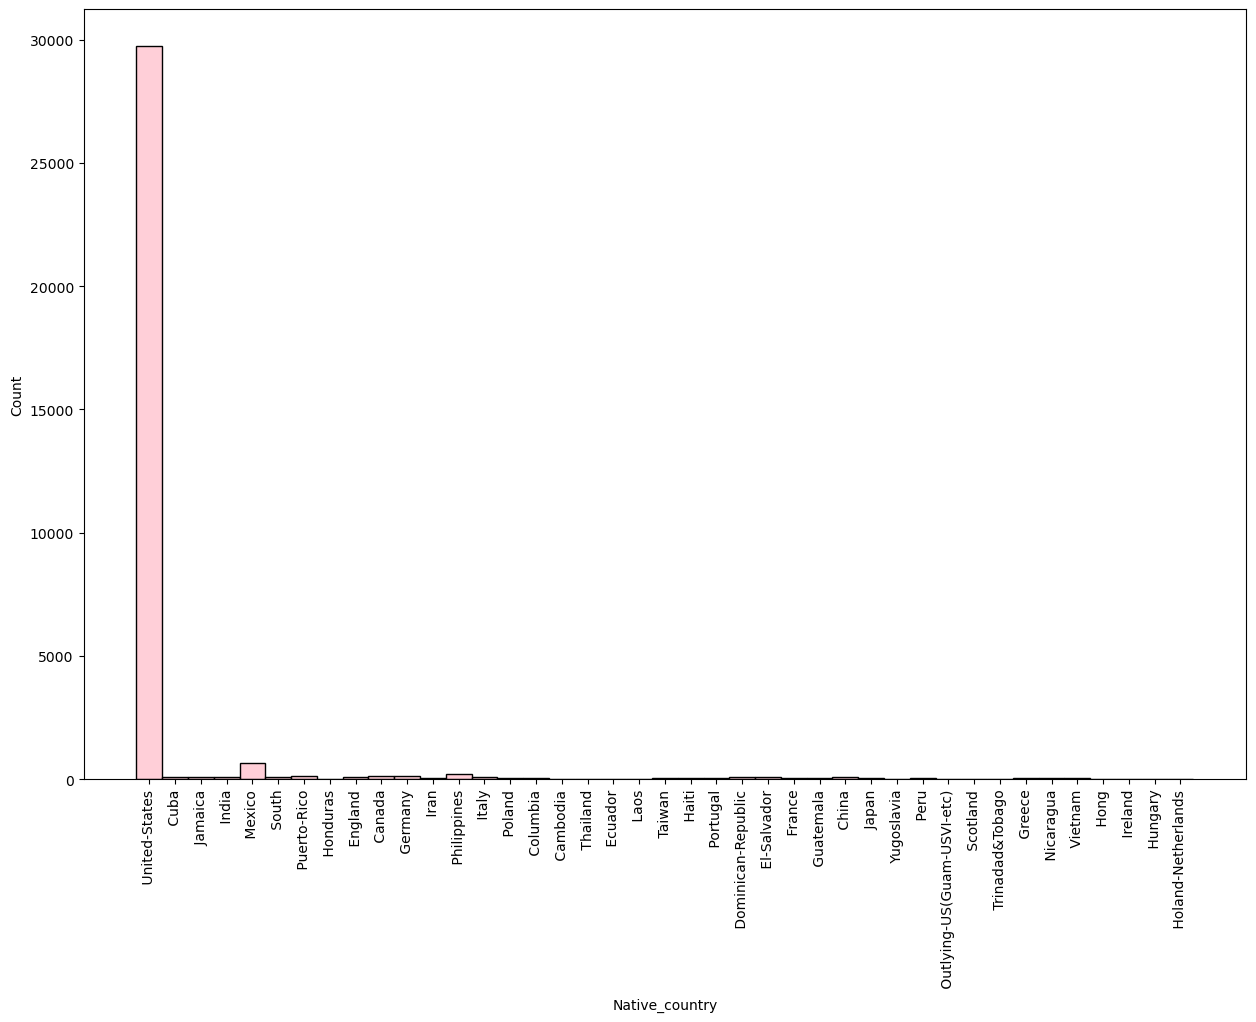

In [40]:
# Histplot for Native_country

plt.figure(figsize=(15,10))
sns.histplot(df['Native_country'], color= "pink")
plt.xticks(rotation=90);

So most of the people in US gets job rather than all other countries.

## BIVARIATE ANALYSIS

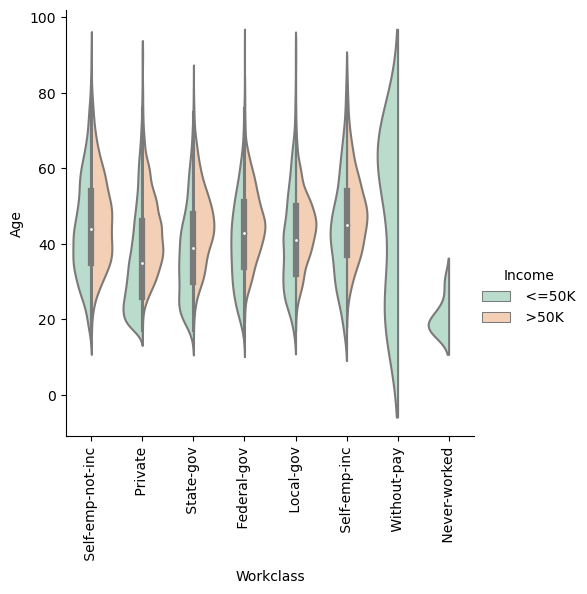

In [41]:
# Let's plot catplot for Workclass and Age

sns.catplot(x= "Workclass", y= "Age", hue=  "Income", kind= "violin", data=df, split= True, palette= 'Pastel2')
plt.xticks(rotation=90);

All the Workclass has chances of getting income >50K except Without-pay and Never-worked, which means if a person is working then there is a chance that he gets income of >50K. But, if he is not at all working then obviously he'll not getting that income.

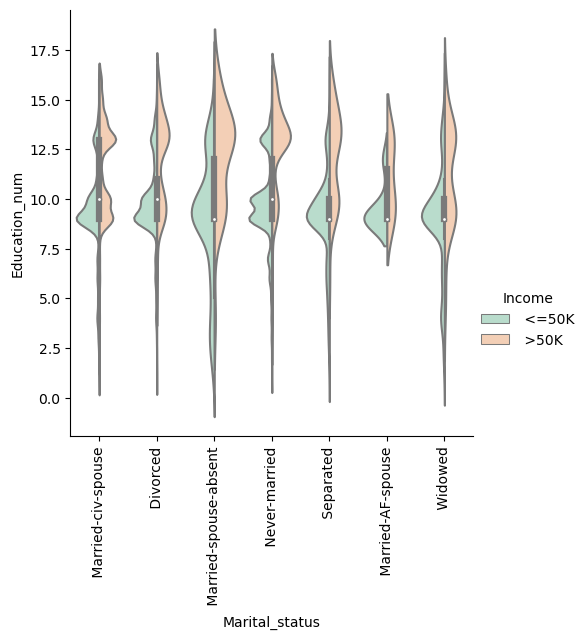

In [42]:
# Let's plot catplot for Marital_status and Education_num

sns.catplot(x= "Marital_status", y= "Education_num", hue=  "Income", kind= "violin", data=df, split= True, palette= 'Pastel2')
plt.xticks(rotation=90);

If the Education number is high then Income is high, but for Married-spouse-absent is showing high education_num.

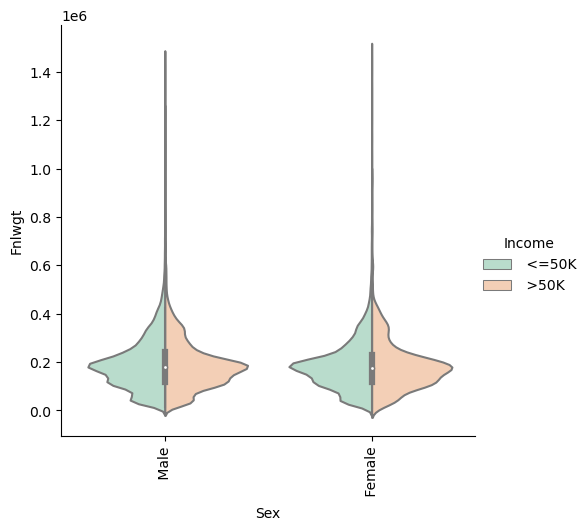

In [43]:
# Let's plot catplot for Sex and Fnlwgt

sns.catplot(x= "Sex", y= "Fnlwgt", hue=  "Income", kind= "violin", data=df, split= True, palette= 'Pastel2')
plt.xticks(rotation=90);

Both for Male and Female the Fnlwgt is same and they have same Income also.

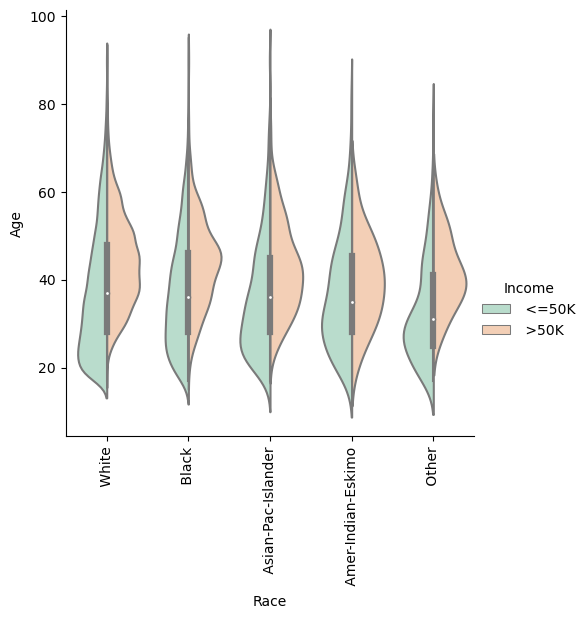

In [44]:
# Let's plot catplot for Race and Age

sns.catplot(x= "Race", y= "Age", hue=  "Income", kind= "violin", data=df, split= True, palette= 'Pastel2')
plt.xticks(rotation=90);

Chances of getting Income >50K  is more in case of whites, that means in US, white people are dominating.

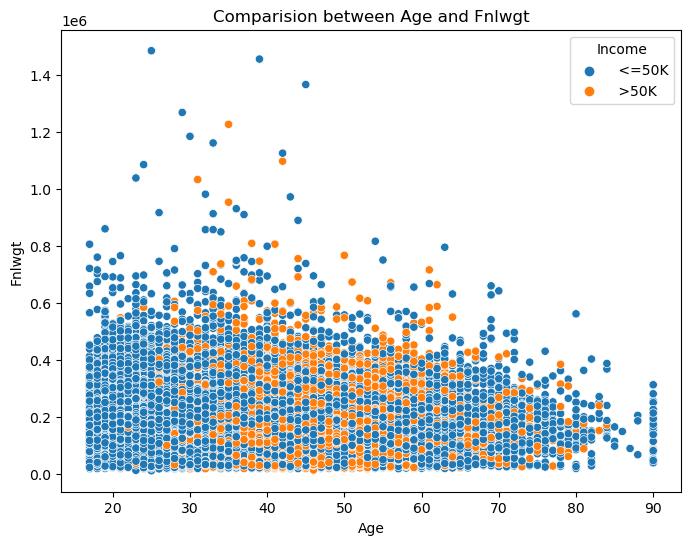

In [45]:
# Comparision between Features

plt.figure(figsize=(8,6))
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'], df['Fnlwgt'], hue= df["Income"]);

As the Age of the worker increases there is less chance to get more Income, also as the Fnlwgt increases then the chances to get Income is decreasing.

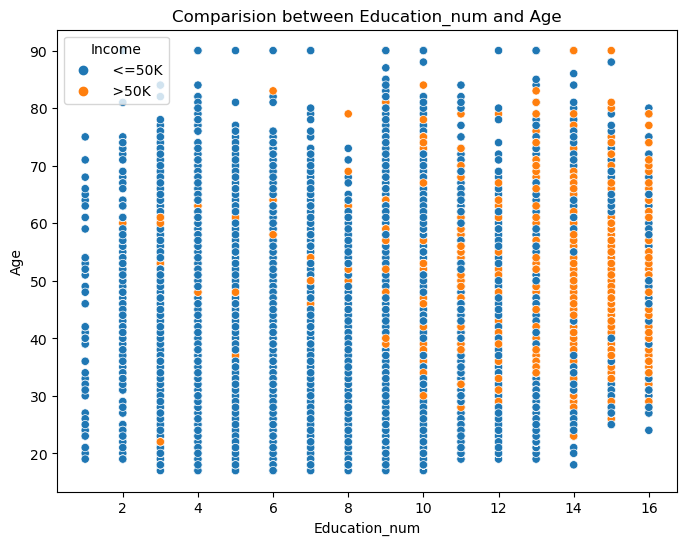

In [46]:
# Comparision between Features

plt.figure(figsize=(8,6))
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'], df['Age'], hue= df["Income"]);

People with Age above 70 has less chance of getting work and as the Education number increases then the chances of getting income >50K is also high.

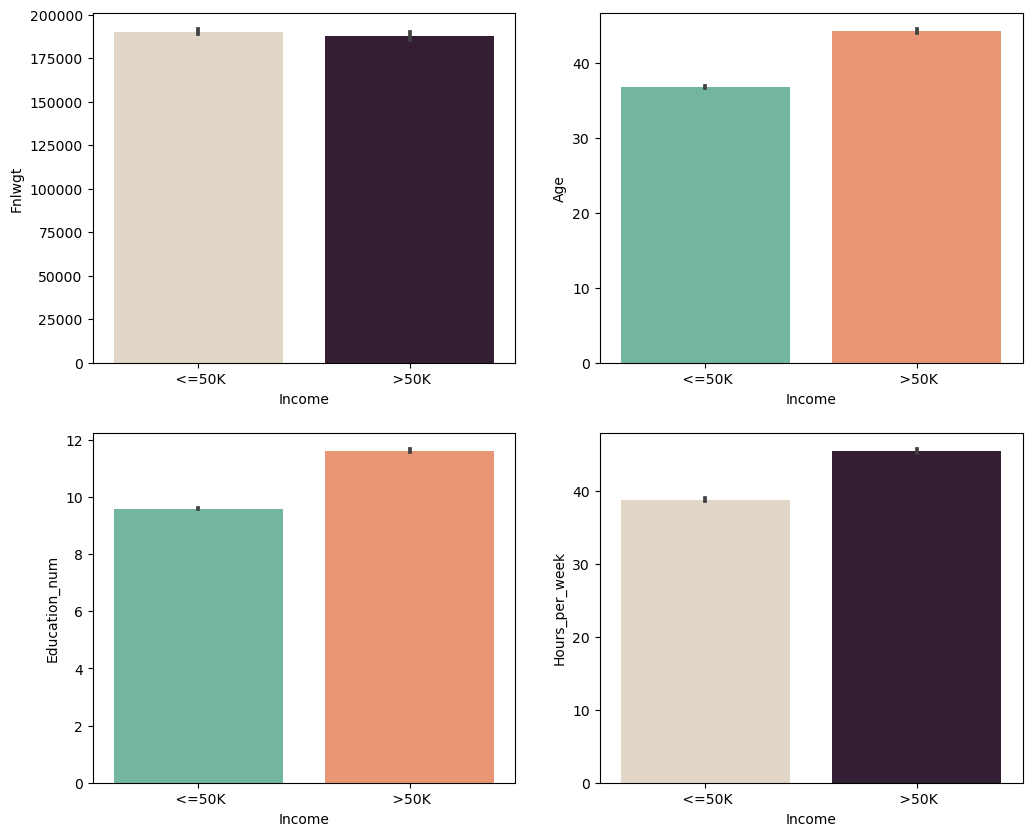

In [47]:
fig, axes= plt.subplots(2,2, figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x= 'Income', y= 'Fnlwgt', ax= axes[0,0], data=df, palette= 'ch:.25')

# Checking income with Age
sns.barplot(x= 'Income', y= 'Age', ax= axes[0,1], data=df, palette= 'Set2')

# Checking income with Education_num
sns.barplot(x= 'Income', y= 'Education_num', ax= axes[1,0], data=df, palette= 'Set2')

# Checking income with Hours_per_week
sns.barplot(x= 'Income', y= 'Hours_per_week', ax= axes[1,1], data=df, palette= 'ch:.25')
plt.show()

* With Fnlwgt, the chances og getting Income >50K and <=50K both are almost equal.
* With Age, the chances of getting >50K is high compared to the chances of getting Income <=50K.
* With Education_num, the chances of getting Income >50K is very higher than <=50K.
* With Hours_per_week, the chances of getting Income >50K is high.

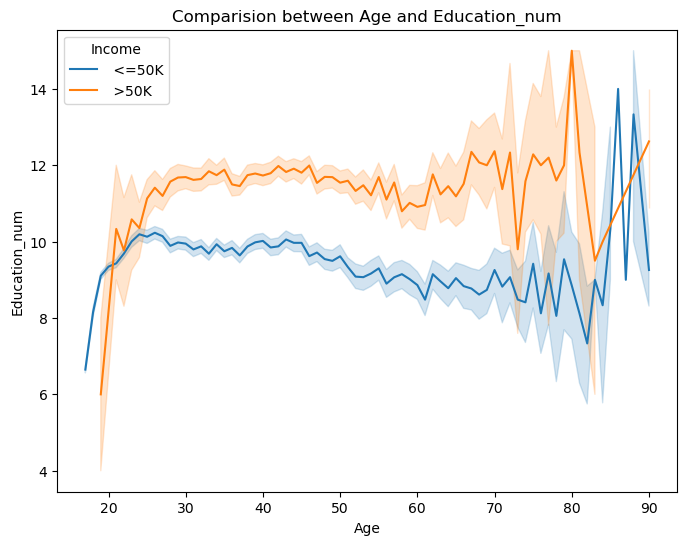

In [48]:
# Comparision between Features using line plot

plt.figure(figsize=(8,6))
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'], df['Education_num'], hue= df["Income"]);

It looks very clear that as the Education_num is increasing chance of getting Income >50K is also increasing. And also as with Age and experience is more the chances of getting 50K Income is also more.

## MULTIVARIATE ANALYSIS

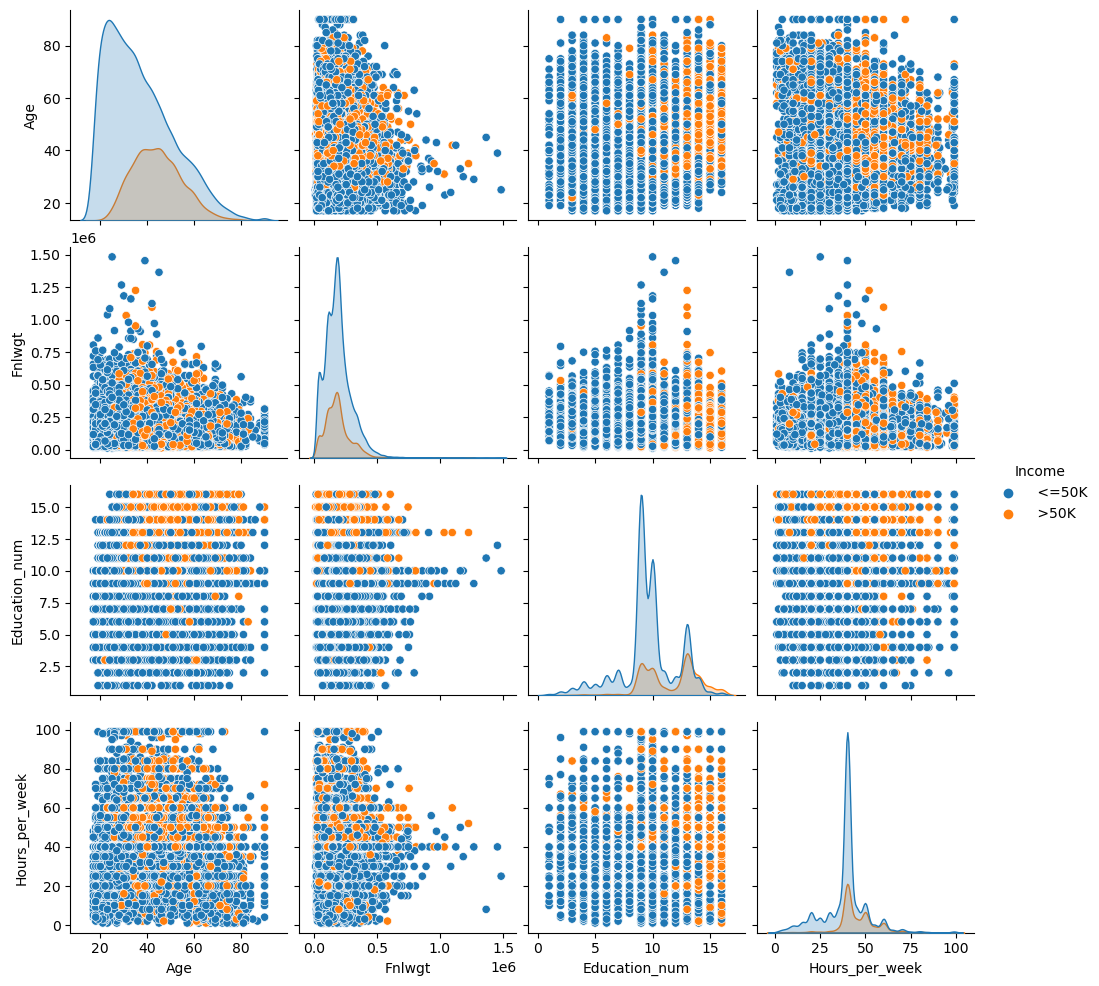

In [49]:
# Pairplot for df
sns.pairplot(df, hue= "Income")

Above are the pairplots of df and I can say that there are some extreme outliers and some skewness in the dataset.

### CHECKING FOR OUTLIERS

<AxesSubplot:>

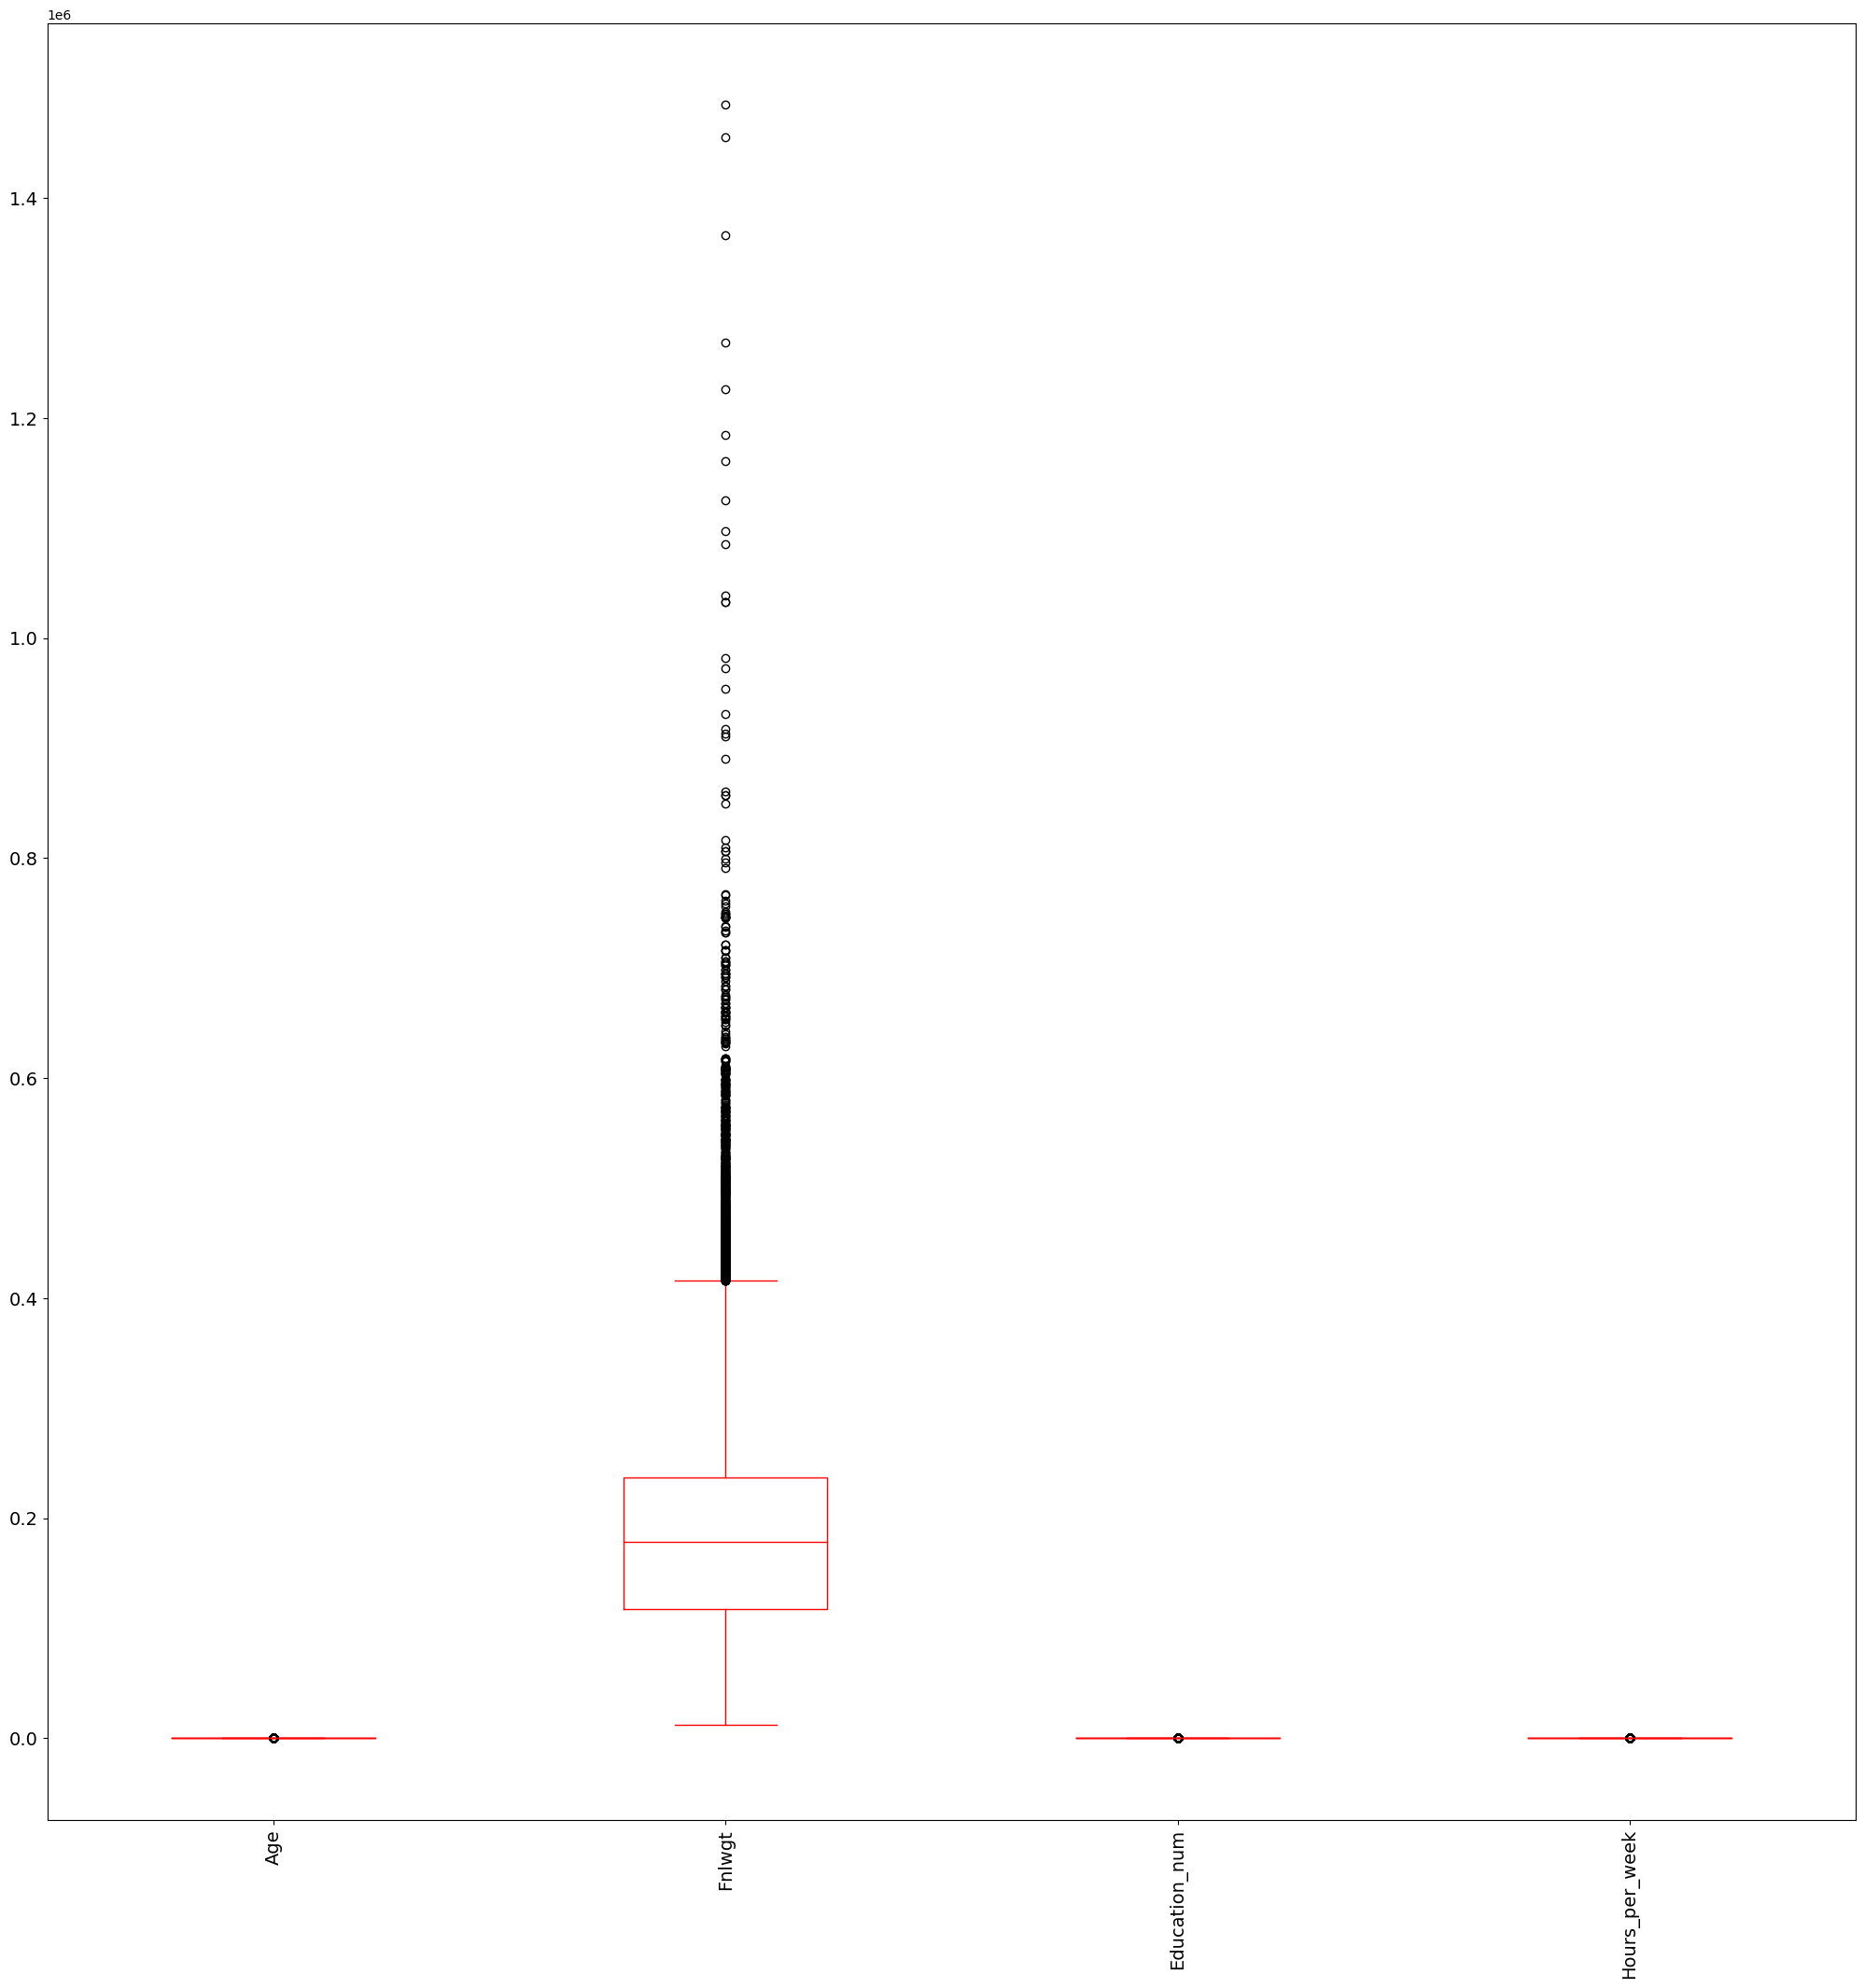

In [50]:
# Checking for outliers using boxplot
df.plot(rot=90, kind= 'box', fontsize=14, figsize=(25,25), color='r')

We can clearly see that all the numerical columns have outliers which needs to ne removed.

### REMOVING OUTLIERS

In [51]:
# Taking all the column's names with outliers as a list
dfoutliers= df[["Age", "Fnlwgt", "Education_num", "Hours_per_week"]]

## ZSCORE METHOD

In [52]:
from scipy.stats import zscore

z= np.abs(zscore(dfoutliers))
df_new= df[(z<3).all(axis=1)]
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


I have removed the outliers using ZScore Method.

In [53]:
# Checking the shape of new dataset
df_new.shape

(31461, 13)

In [54]:
# Checking the shape of old dataset
df.shape

(32560, 13)

In [55]:
# Checking dataloss in zscore method

dataloss= (((32560-31461)/32560)*100)
dataloss

3.3753071253071254

In ZScore Method, the dataloss is around 3.38% which is less than 10%.

## IQR METHOD

In [56]:
# 1st quantile
Q1= dfoutliers.quantile(0.25)

# 3rd quantile
Q3= dfoutliers.quantile(0.75)

# IQR
IQR= Q3-Q1
df_1= df[~((df< (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

Using IQR I have removed the outliers.

In [57]:
# Checking the shape of new dataset
df_1.shape

(21950, 13)

In [58]:
# Checking the shape of old dataset
df.shape

(32560, 13)

In [59]:
# Checking dataloss in IQR method

dataloss= (((32560-21950)/32560)*100)
dataloss

32.58599508599509

There is a great dataloss in IQR Method, so I'll stick to ZScore Method.

### CHECKING FOR SKEWNESS

In [60]:
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

### Removing Skewness using yeo-johnson method

In [61]:
fea= ["Fnlwgt"]

In [62]:
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method= 'yeo-johnson')
'''
parameters:
method= 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or 'yeo-johnson'\n"

I have removed the skewness.

In [63]:
df_new[fea]= pt.fit_transform(df_new[fea].values)

In [64]:
# Checking skewness again
df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

<AxesSubplot:ylabel='Density'>

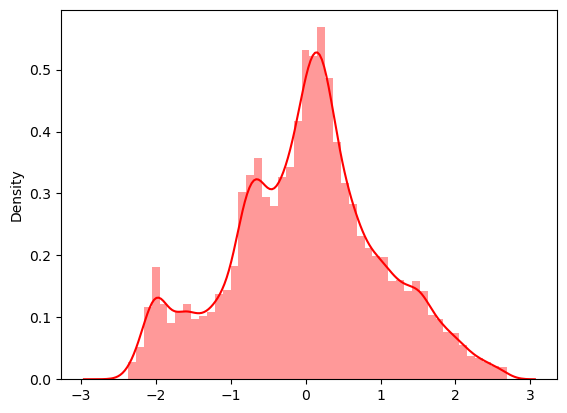

In [65]:
# Checking distplot for skewed columns after removing skewness
sns.distplot(df_new[fea], color= 'r')

It looks like skewess have been removed completely.

## LABEL ENCODING

In [66]:
# Separating categorical columns in df_new

cat_col= []
for i in df_new.dtypes.index:
    if df_new.dtypes[i]== 'object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [67]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(le.fit_transform)

In [68]:
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


Using Label Encoder, I have encoded the categorical columns.

In [69]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,38,0


This is the new dataset after Encoding.

### Checking correlation using heatmap

In [70]:
cor= df_new.corr()

In [71]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


Above are the correlations of all the pair of features. To get better visualization on the correlation of features, I will plot heatmap.

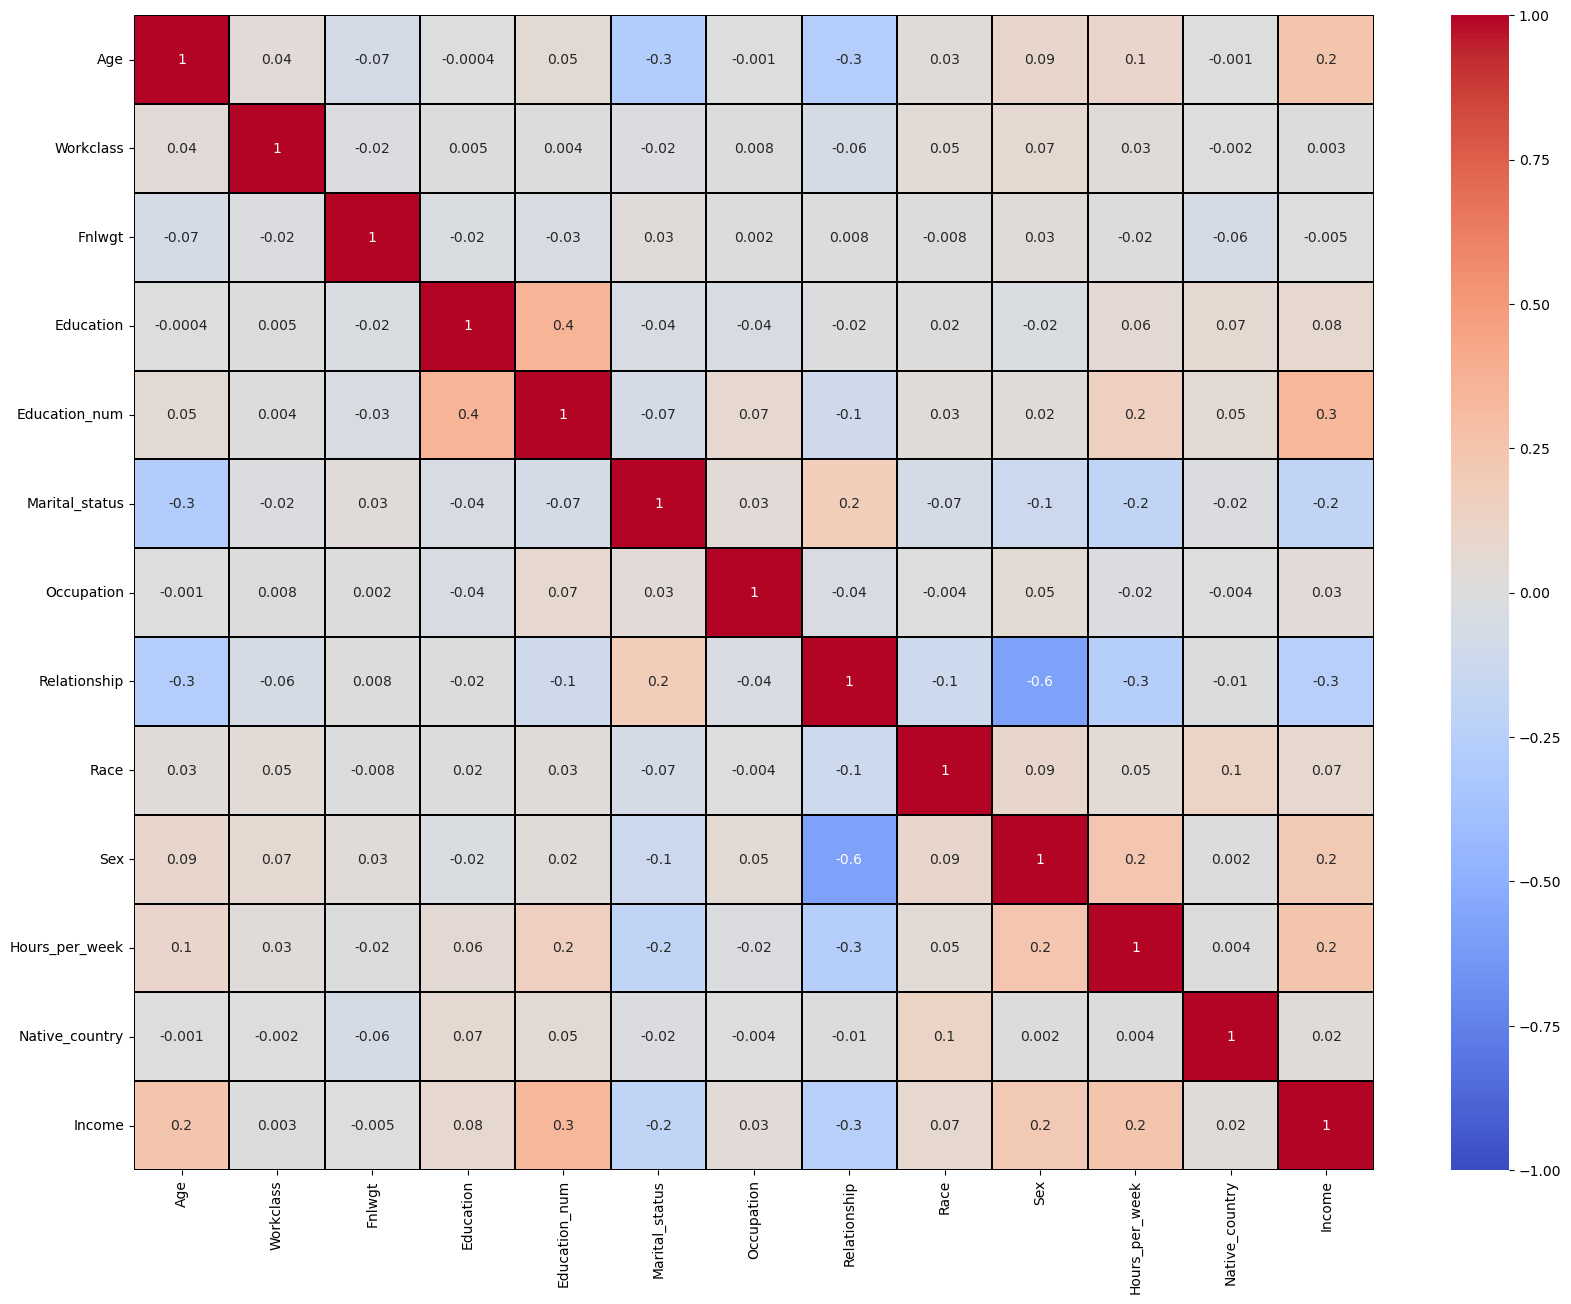

In [72]:
# Visualizing the correlation matrix

plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(), linewidths= .1, vmin= -1, vmax= 1, fmt= '.1g', annot= True, linecolor= "black", annot_kws= {'size':10}, cmap= "coolwarm")
plt.yticks(rotation=0);

* By looking into the heatmap, we can see that there is no multicollinearity issue.
* Workclass and Fnlwgt has very less correlation with the target.
* Native_country, Occupation, Race and Education has less correlation with the target column.

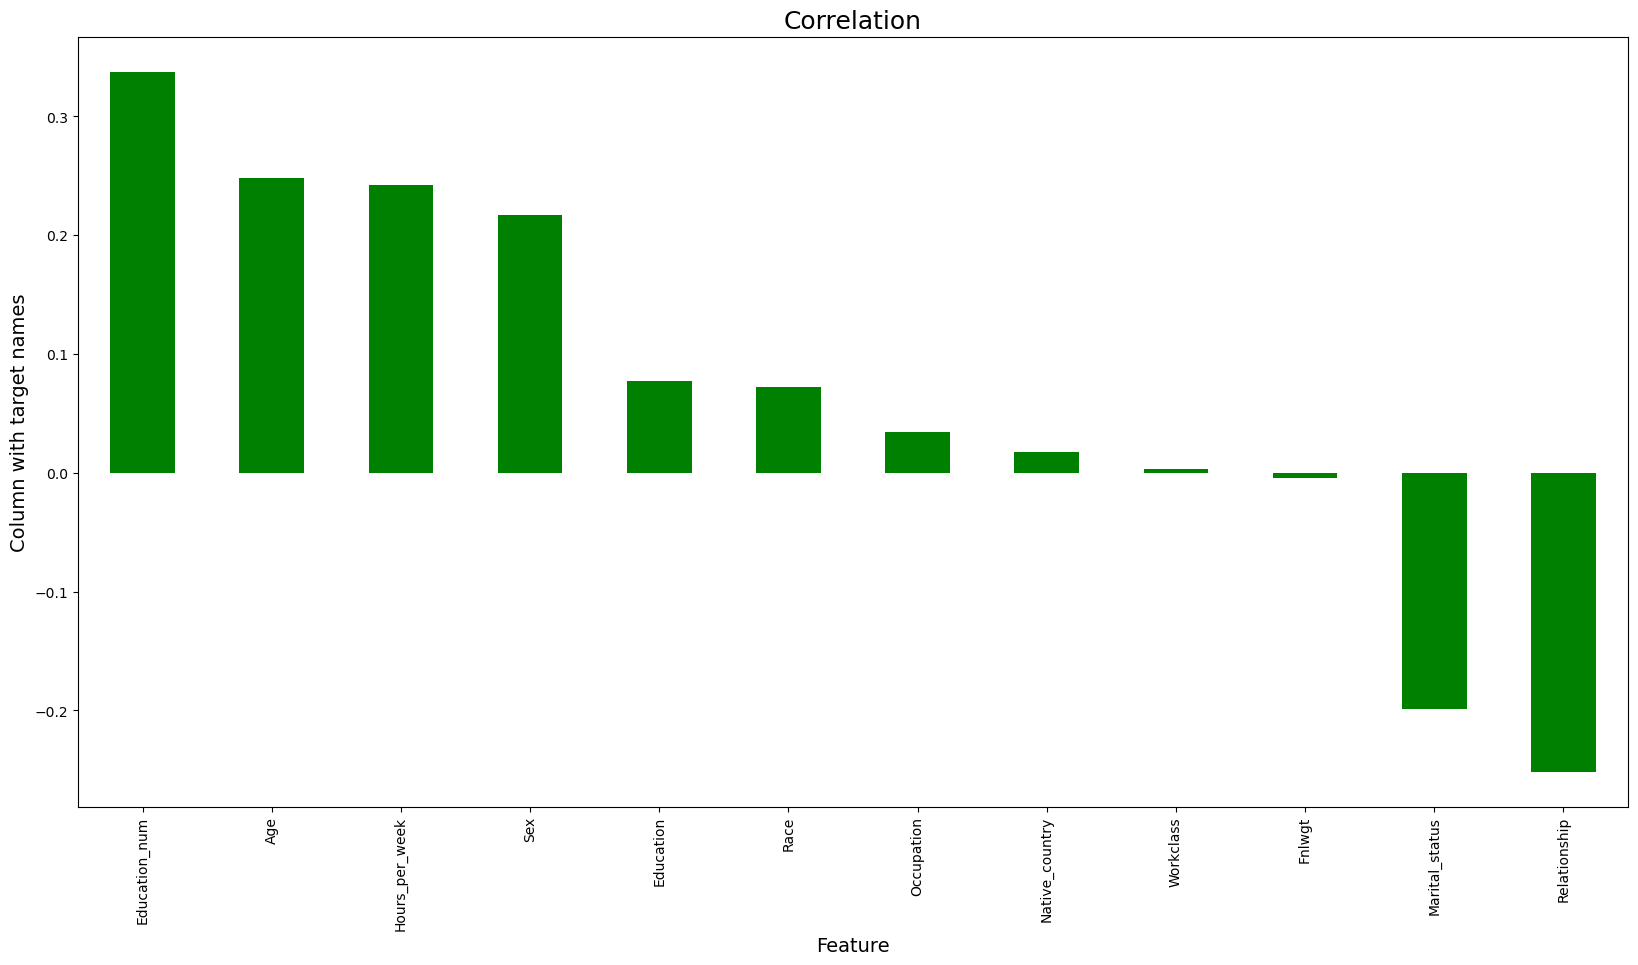

In [73]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending= False).drop(['Income']).plot(kind= 'bar', color='g')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Column with target names', fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column.

In [74]:
# Dropping less correlated column
df_new= df_new.drop(["Workclass"], axis=1)

## Separating Features and Label

In [75]:
x= df_new.drop("Income", axis=1)
y= df_new["Income"]

## Scaling the data using Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X= pd.DataFrame(ss.fit_transform(x), columns= x.columns)

In [77]:
X.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062


This is the data of independent variables after scaling.

## Balancing the target variable

In [78]:
# Checking the value counts of target column
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

## SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

sm= SMOTE()
X, y= sm.fit_resample(X,y)

In [80]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

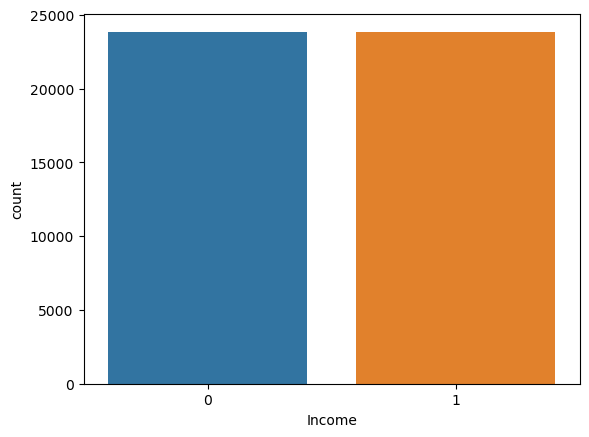

In [81]:
# Visualizing the data after oversampling
sns.countplot(y)

Now the data looks balanced.

## Finding Best Random State and Accuracy

In [82]:
# Importing libraries

from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [83]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.30, random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(X_train, y_train)
    pred= rfc.predict(X_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, " on Random State ", maxRS)

Best Accuracy is  0.8845025153717161  on Random State  79


I got the best accuracy and random state.

In [84]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.30, random_state= maxRS)

## CLASSIFICATION ALGORITHMS

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score


## DECISION TREE CLASSIFIER

In [89]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prediction
preddtc= dtc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, preddtc))
print('Confusion Matrix:', confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

Accuracy Score: 0.8318893236444941
Confusion Matrix: [[5862 1278]
 [1128 6044]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7140
           1       0.83      0.84      0.83      7172

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



DTC is giving 83% accuracy.

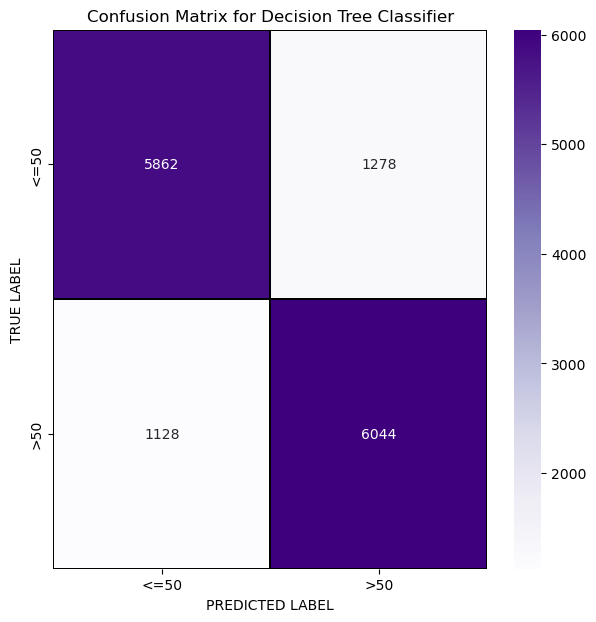

In [90]:
# Let's plot for dtc

cm= confusion_matrix(y_test, preddtc)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=0.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values are predicted values in Decision Tree Classifier model using confusion matrix.

## RANDOM FOREST CLASSIFIER

In [91]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

# Prediction
predrfc= rfc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, predrfc))
print('Confusion Matrix:', confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

Accuracy Score: 0.8839435438792621
Confusion Matrix: [[6170  970]
 [ 691 6481]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7140
           1       0.87      0.90      0.89      7172

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



RFC is giving 88% accuracy.

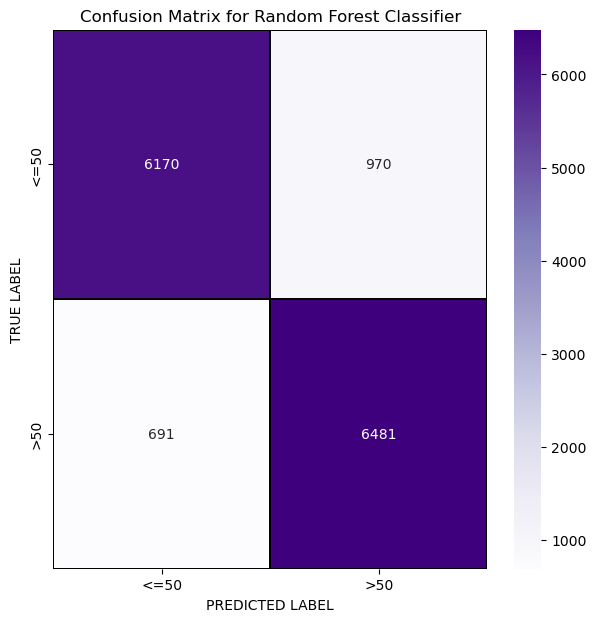

In [93]:
# Let's plot for rfc

cm= confusion_matrix(y_test, predrfc)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## LOGISTIC REGRESSION

In [94]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
predlr= lr.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, predlr))
print('Confusion Matrix:', confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy Score: 0.7509782001117943
Confusion Matrix: [[5211 1929]
 [1635 5537]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      7140
           1       0.74      0.77      0.76      7172

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



LR is giving 75% accuracy.

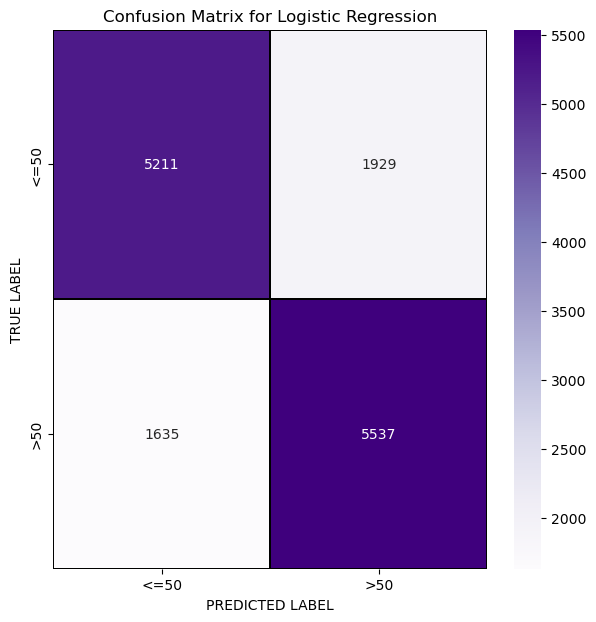

In [95]:
# Let's plot for lr

cm= confusion_matrix(y_test, predlr)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## SUPPORT VECTOR CLASSIFIER (SVC)

In [96]:
svc= SVC()
svc.fit(X_train, y_train)

# Prediction
predsvc= svc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, predsvc))
print('Confusion Matrix:', confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

Accuracy Score: 0.8151900503074343
Confusion Matrix: [[5359 1781]
 [ 864 6308]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      7140
           1       0.78      0.88      0.83      7172

    accuracy                           0.82     14312
   macro avg       0.82      0.82      0.81     14312
weighted avg       0.82      0.82      0.81     14312



SVC is giving 81% accuracy.

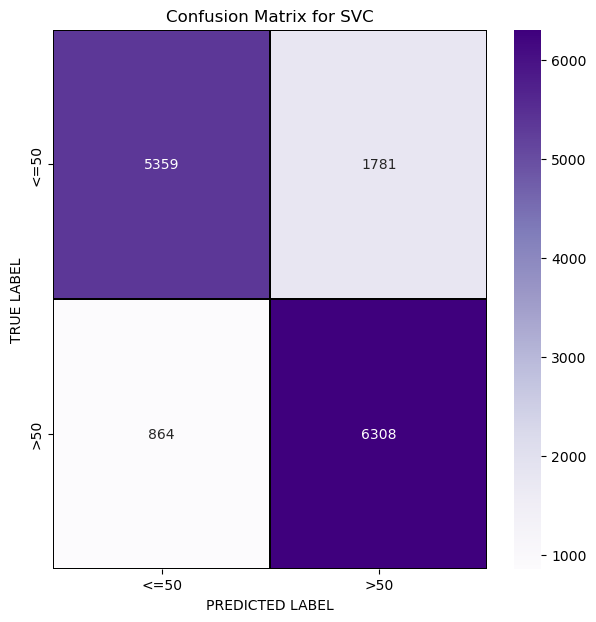

In [97]:
# Let's plot for svc

cm= confusion_matrix(y_test, predsvc)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVC')
plt.show()

## KNEIGHBORS CLASSIFIER (KNN)

In [98]:
knn= KNN()
knn.fit(X_train, y_train)

# Prediction
predknn= knn.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, predknn))
print('Confusion Matrix:', confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

Accuracy Score: 0.8380380100614868
Confusion Matrix: [[5416 1724]
 [ 594 6578]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      7140
           1       0.79      0.92      0.85      7172

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



KNN is giving 84% accuracy score.

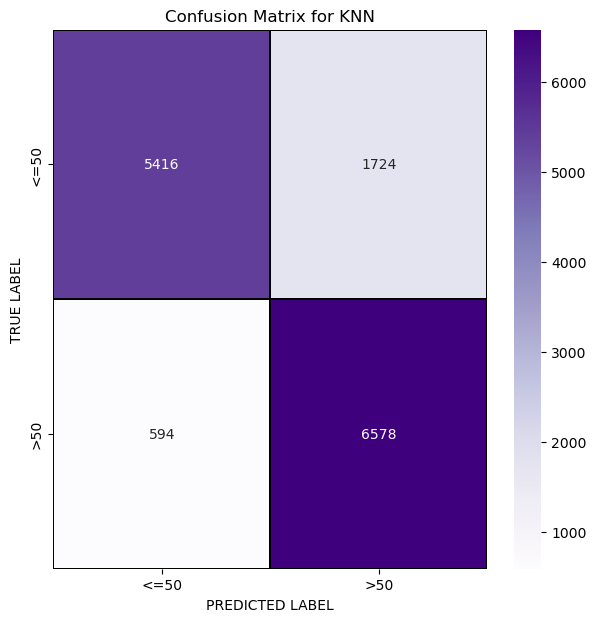

In [99]:
# Let's plot for knn

cm= confusion_matrix(y_test, predknn)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN')
plt.show()

## GRADIENT BOOSTING CLASSIFIER

In [100]:
gbc= GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Prediction
predgbc= gbc.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, predgbc))
print('Confusion Matrix:', confusion_matrix(y_test, predgbc))
print(classification_report(y_test, predgbc))

Accuracy Score: 0.8514533258803801
Confusion Matrix: [[5791 1349]
 [ 777 6395]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7140
           1       0.83      0.89      0.86      7172

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.85      0.85      0.85     14312



GBC is giving 85% accuracy score.

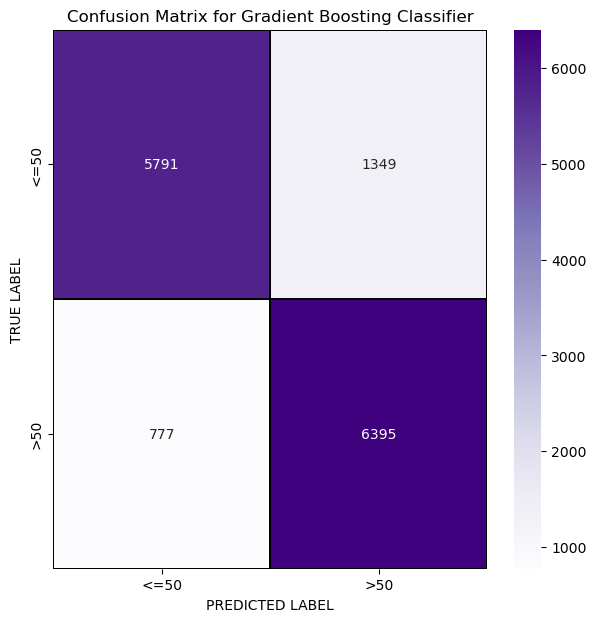

In [101]:
# Let's plot for gbc

cm= confusion_matrix(y_test, predgbc)

x_axis_labels= ["<=50", ">50"]
y_axis_labels= ["<=50", ">50"]

f,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor= "black", fmt= ".0f", ax=ax, cmap= "Purples", xticklabels= x_axis_labels, yticklabels= y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## CROSS VALDATION SCORE

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
# CV score for Logistic Regression
print(cross_val_score(lr,X,y,cv=5).mean())

0.7487739408192567


In [104]:
# CV score for Decision Tree Classifier
print(cross_val_score(dtc,X,y,cv=5).mean())

0.8300022335182795


In [105]:
# CV score for Random Forest Classifier
print(cross_val_score(rfc,X,y,cv=5).mean())

0.8792619969665715


In [106]:
# CV score for SVC
print(cross_val_score(svc,X,y,cv=5).mean())

0.8155579497598324


In [107]:
# CV score for KNN
print(cross_val_score(knn,X,y,cv=5).mean())

0.8446739574075292


In [108]:
# CV score for Gradient Boosting Classifier
print(cross_val_score(gbc,X,y,cv=5).mean())

0.8455339662945901


By looking into the differences of model accuracy and cross validation score, I found that Random Forest Classifier as the best model.

## HYPER PARAMETER TUNING

In [110]:
from sklearn.model_selection import GridSearchCV

In [114]:
parameter= {'criterion':['gini', 'entropy'],
           'max_depth': [10,15,20,25],
           'n_estimators':[100,200,300,400],
           'max_features': ["auto", "sqrt", "log2"]}

In [115]:
GCV= GridSearchCV(RandomForestClassifier(), parameter, cv=5)

In [116]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [117]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 300}

In [118]:
Final_mod= RandomForestClassifier(criterion= 'gini', max_depth= 25, max_features= 'auto', n_estimators=300)
Final_mod.fit(X_train, y_train)
pred= Final_mod.predict(X_test)
acc= accuracy_score(y_test, pred)

print(acc*100)

88.2406372275014


I got the best model as RFC and I got the accuracy of 88.24% after tuning which is good.

## ROC-AUC CURVE

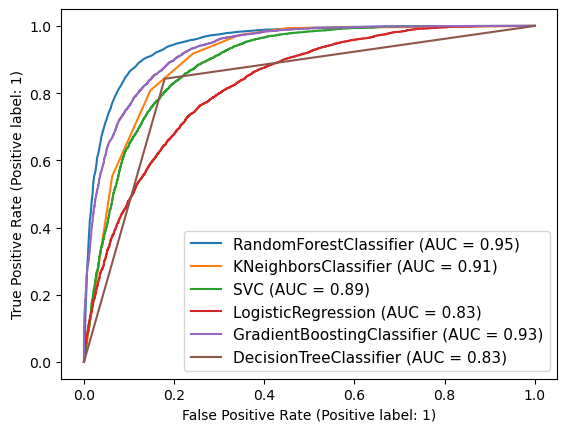

In [119]:
# Plotting for all the models used here

from sklearn import datasets, metrics, model_selection
from sklearn.metrics import plot_roc_curve

disp= plot_roc_curve(rfc, X_test, y_test)
plot_roc_curve(knn, X_test, y_test, ax= disp.ax_)
plot_roc_curve(svc, X_test, y_test, ax= disp.ax_)
plot_roc_curve(lr, X_test, y_test, ax= disp.ax_)
plot_roc_curve(gbc, X_test, y_test, ax= disp.ax_)
plot_roc_curve(dtc, X_test, y_test, ax= disp.ax_)

plt.legend(prop= {'size':11}, loc= 'lower right')
plt.show()

Above is the ROC Curve for all the models that I have predicted and the AUC Values can also be seen in the plot.

## SAVING THE MODEL

In [121]:
# Saving the model as .pkl file
import joblib
joblib.dump(Final_mod, "Census_Income.pkl")

['Census_Income.pkl']

## PREDICTIONS

In [122]:
# Loading the saved model
model= joblib.load("Census_Income.pkl")

# Prediction
prediction= model.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 0, 0])

In [123]:
pd.DataFrame([model.predict(X_test)[:], y_test[:]], index= ["Predicted", "Original"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
Predicted,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
Original,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,1,0,0


Above the Predicted Values and the Original Values are almost Same.